In [3]:
import numpy as np
import scipy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('C:\\Users\\zhouzhou\\Desktop\\RF\\data1.csv',encoding='utf-8')

In [5]:
df.head()

,流域面积,相对高差,平均坡度,ndvi,clay,sand,silt,一级道路密度,二级道路密度,三级道路密度,四级道路密度,高速公路密度,铁路密度,断裂带密度,雨季降雨量均值,暴雨数量,特大暴雨数量,大暴雨数量,大雨数量,发生
0,0.567935,277,27.903000,0.027054,8.000000,80.000000,12.000000,0,0.0,0.0,0.005915,0,0,0.012694,2.82563,0.004865,0.004865,0.004865,0.004865,0
1,57.844101,3176,30.784300,0.370054,15.963000,55.500000,28.537001,0,0.0,0.0,0.000080,0,0,0.000054,2.95123,0.495488,0.495488,0.495488,0.495488,1
2,0.801935,1306,34.122002,-0.035788,8.131340,79.666603,12.202100,0,0.0,0.0,0.006642,0,0,0.006128,3.21309,0.006869,0.006869,0.006869,0.006869,0
3,98.233101,4197,33.801998,0.290875,16.052601,55.326302,28.621099,0,0.0,0.0,0.000058,0,0,0.000085,3.19034,2.000000,2.000000,2.000000,2.000000,1
4,2.046280,1298,42.111301,-0.153919,8.000000,80.000000,12.000000,0,0.0,0.0,0.002916,0,0,0.034815,3.53715,0.017528,0.017528,0.017528,0.017528,0


In [6]:
df.发生.nunique()

2

In [7]:
df.发生.value_counts()

0    624
1    446
Name: 发生, dtype: int64

In [8]:
y=df.发生
y.head()

0    0
1    1
2    0
3    1
4    0
Name: 发生, dtype: int64

In [9]:
x=df.drop('发生', axis=1)   #dataframe.drop('isrun', axis=1)
x.head()

,流域面积,相对高差,平均坡度,ndvi,clay,sand,silt,一级道路密度,二级道路密度,三级道路密度,四级道路密度,高速公路密度,铁路密度,断裂带密度,雨季降雨量均值,暴雨数量,特大暴雨数量,大暴雨数量,大雨数量
0,0.567935,277,27.903000,0.027054,8.000000,80.000000,12.000000,0,0.0,0.0,0.005915,0,0,0.012694,2.82563,0.004865,0.004865,0.004865,0.004865
1,57.844101,3176,30.784300,0.370054,15.963000,55.500000,28.537001,0,0.0,0.0,0.000080,0,0,0.000054,2.95123,0.495488,0.495488,0.495488,0.495488
2,0.801935,1306,34.122002,-0.035788,8.131340,79.666603,12.202100,0,0.0,0.0,0.006642,0,0,0.006128,3.21309,0.006869,0.006869,0.006869,0.006869
3,98.233101,4197,33.801998,0.290875,16.052601,55.326302,28.621099,0,0.0,0.0,0.000058,0,0,0.000085,3.19034,2.000000,2.000000,2.000000,2.000000
4,2.046280,1298,42.111301,-0.153919,8.000000,80.000000,12.000000,0,0.0,0.0,0.002916,0,0,0.034815,3.53715,0.017528,0.017528,0.017528,0.017528


In [10]:
seed=5
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=seed)

In [11]:
rfc = RandomForestClassifier()     #实例化 
rfc = rfc.fit(xtrain,ytrain)       #用训练集数据训练模型 

result = rfc.score(xtest,ytest)    #导入测试集，rfc的接口score计算的是模型准确率accuracy
result

0.7632398753894081

In [12]:
roc_auc_score(ytest, rfc.predict_proba(xtest)[:,1]) 

0.815099715099715

In [13]:
print ('各feature的重要性：%s' % rfc.feature_importances_)

各feature的重要性：[4.07216231e-02 1.11363740e-01 1.49646267e-01 5.62997452e-02
 6.36459883e-02 5.09911018e-02 4.34248957e-02 0.00000000e+00
 4.41838431e-02 3.86615424e-02 7.91242242e-02 5.44339307e-05
 0.00000000e+00 3.91421749e-02 1.33358610e-01 3.73094394e-02
 3.64092140e-02 3.94419201e-02 3.62212365e-02]


Feature ranking:
 1) 平均坡度                           0.149646
 2) 雨季降雨量均值                        0.133359
 3) 相对高差                           0.111364
 4) 四级道路密度                         0.079124
 5) clay                           0.063646
 6) ndvi                           0.056300
 7) sand                           0.050991
 8) 二级道路密度                         0.044184
 9) silt                           0.043425
10) 流域面积                           0.040722
11) 大暴雨数量                          0.039442
12) 断裂带密度                          0.039142
13) 三级道路密度                         0.038662
14) 暴雨数量                           0.037309
15) 特大暴雨数量                         0.036409
16) 大雨数量                           0.036221
17) 高速公路密度                         0.000054
18) 一级道路密度                         0.000000
19) 铁路密度                           0.000000


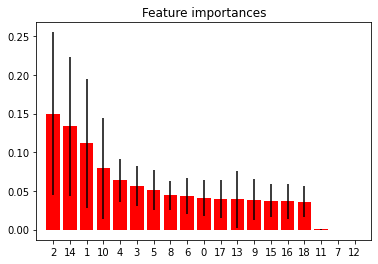

In [14]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]# Print the feature ranking
print("Feature ranking:")
for f in range(min(20,xtrain.shape[1])):    
    print("%2d) %-*s %f" % (f + 1, 30, xtrain.columns[indices[f]], importances[indices[f]]))# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(xtrain.shape[1]), importances[indices],  color="r", yerr=std[indices], align="center")
plt.xticks(range(xtrain.shape[1]), indices)
plt.xlim([-1, xtrain.shape[1]])
plt.show()

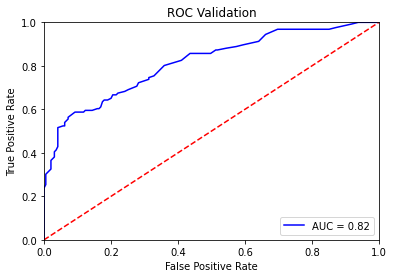

In [15]:
predictions_validation = rfc.predict_proba(xtest)[:,1]
fpr, tpr, _ = roc_curve(ytest, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, xtrain, ytrain)
print(scores.mean())                             

clf2 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf2, xtrain, ytrain)
print(scores.mean())                             

0.7036331096196867
0.7743624161073825


In [17]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [18]:
param_test1 = {'n_estimators': range(25,500,25)}#25-500进行该参数调参，步长为25
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100, 
                                                           min_samples_leaf=20,
                                                           max_depth=8, random_state=10), 
                        param_grid = param_test1, 
                        scoring='roc_auc', 
                        cv=5)
gsearch1.fit(xtrain, ytrain)
print(gsearch1.best_params_, gsearch1.best_score_)#打印最好的超参数和取该值的时候的ROC值


{'n_estimators': 75} 0.822484610123119


In [25]:
param_test2 = {'min_samples_split':range(60, 200, 20), 'min_samples_leaf':range(10, 110, 10)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=75,
                                                           max_depth=8, random_state=10), 
                        param_grid = param_test2, 
                        scoring='roc_auc',
                        cv=5)
gsearch2.fit(xtrain,ytrain)
print(gsearch2.best_params_, gsearch2.best_score_)

{'min_samples_leaf': 10, 'min_samples_split': 60} 0.8305813953488371


In [19]:
param_test3 = {'max_depth':range(3, 30, 1)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=75,
                                                           min_samples_split=60, 
                                                           min_samples_leaf=10,
                                                           random_state=10), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        cv=5)
gsearch3.fit(xtrain,ytrain)
print(gsearch3.best_params_, gsearch3.best_score_)

{'max_depth': 8} 0.8305813953488371


In [20]:
roc_auc_score(ytest, gsearch3.best_estimator_.predict_proba(xtest)[:,1])

0.7873422873422874

In [28]:
gsearch3.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=10, min_samples_split=60,
                       n_estimators=75, random_state=10)

In [26]:
param_test4 = {'criterion':['gini', 'entropy'], 'class_weight':[None, 'balanced']}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=75,
                                                           max_depth=8, 
                                                           min_samples_split=60, 
                                                           min_samples_leaf=10,
                                                           random_state=10), 
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        cv=5)
gsearch4.fit(xtrain,ytrain)
print(gsearch4.best_params_, gsearch4.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy'} 0.8342600034199726


In [27]:
roc_auc_score(ytest, gsearch4.best_estimator_.predict_proba(xtest)[:,1])

0.7926332926332926

In [28]:
gsearch4.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=10, min_samples_split=60,
                       n_estimators=75, random_state=10)

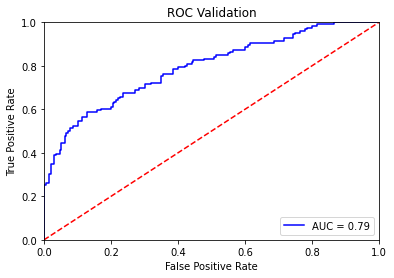

In [29]:
predictions_validation = gsearch4.predict_proba(xtest)[:,1]
fpr, tpr, _ = roc_curve(ytest, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
print ('各feature的重要性：%s' % gsearch4.feature_importances_)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'